In [1]:
import networkx as nx, matplotlib.pyplot as plt
import numpy as np, pandas as pd
import math, seaborn as sns
from scipy import stats
from sklearn import cluster as clstr
from networkx import edge_betweenness_centrality
from networkx.algorithms import community
import itertools

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df1 = pd.read_csv('C:/Users/saich/OneDrive/Desktop/SNA/project/marvel_characters.csv')
df2 = pd.read_csv('C:/Users/saich/OneDrive/Desktop/SNA/project/marvel_titles.csv')

In [3]:
GT = nx.Graph()
new_G = nx.Graph()
#GT.add_nodes_from(df['character'].tolist(),bipartite=1,node_color='w',alpha=0.4,node_shape='d')

for index, row in df2.iterrows():
  GT.add_node(row['title'] + '*', bipartite=0, media_type=row['type'], release_year=row['release_year'], release_month=row['release_month'], release_day=row['release_day'], rating=row['rating'], length=row['length'], starts=row['stars'], genres=row['genres'])

In [4]:
for index, row in df1.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  GT.add_node(char_name, bipartite=1, alias=row['character_alias'], actor=row['actor'])

for index, row in df1.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  GT.add_edge(row['title'] + '*', char_name)

In [5]:
character_nodes = {n for n, d in GT.nodes(data=True) if d['bipartite'] == 1}
title_nodes = set(GT) - character_nodes 

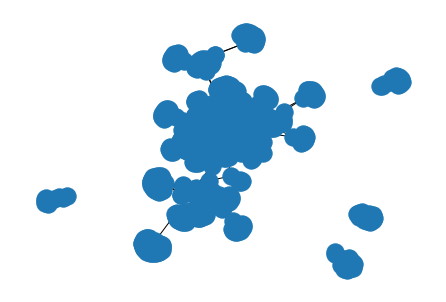

In [6]:
nx.draw(GT)

In [7]:
def deg_dst(G7): # degree distribution of titles and characters
    degrees = [G7.degree(n) for n in title_nodes]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'title degree distribution')
    plt.legend()
    plt.show()
    degrees1 = [G7.degree(n) for n in character_nodes]
    deg1,freq1 = np.unique(degrees1,return_counts=True)
    plt.plot(deg1,freq1,label = 'characters degree distribution')
    plt.legend()
    plt.show()
def avg_deg_cc(G): # average degree and clustering co-efficient
    avg_cc_G = nx.transitivity(G)
    avg_deg_G = G.degree()
    deg_sum_G =0
    for j in list(avg_deg_G):
        deg_sum_G += j[1]
    avg_deg_G =  deg_sum_G/len(G.nodes())
    return (avg_deg_G, avg_cc_G)

In [8]:
def deg_dst_Graph(G7):
    degrees = [G7.degree(n) for n in G7.nodes()]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'Total nodes degree distribution')
    plt.legend()
    plt.show()

###  Adding the edges between the characters by considering their common titles

In [9]:
#copying the graph
G_new = GT.copy()
print(len(G_new.nodes()), len(G_new.edges()))

854 1142


In [10]:
l=[0,1]
for i in character_nodes:
    for j in character_nodes: 
        l[0]=i
        l[1]=j
        num = len(list(set([n for n in GT.neighbors(l[0])]) & set([m for m in GT.neighbors(l[1])])))
        if num>=3 and G_new.has_edge(i,j)==False and i!=j:
            print(i,j, num)
            G_new.add_edge(i,j)

Heimdall Jane Foster 3
Heimdall Thor 5
Heimdall Volstagg 3
Heimdall Hogun 3
Heimdall Loki 4
Heimdall Bruce Banner 3
Heimdall Fandral 3
Heimdall Odin 3
Heimdall Erik Selvig 4
Heimdall Sif 3
Heimdall Darcy Lewis 3
Vision Wanda Maximoff 3
Bucky Barnes Brock Rumlow 3
Bucky Barnes Howard Stark 3
Bucky Barnes T'Challa 3
Bucky Barnes Wanda Maximoff 3
Bucky Barnes Tony Stark 3
Bucky Barnes Peter Parker 3
Bucky Barnes James Rhodes 4
Bucky Barnes Natasha Romanoff 4
Bucky Barnes Secretary Ross 3
Bucky Barnes Friday 3
Bucky Barnes Steve Rogers 5
Bucky Barnes Nick Fury 3
Bucky Barnes Sam Wilson 5
Bucky Barnes Johann Schmidt 3
Bucky Barnes Peggy Carter 3
Okoye M'Baku 3
Okoye T'Challa 3
Okoye Shuri 3
MJ Peter Parker 3
MJ Happy Hogan 3
MJ May Parker 3
Timothy 'Dum Dum' Dugan Howard Stark 3
Timothy 'Dum Dum' Dugan Peggy Carter 4
Brock Rumlow Natasha Romanoff 3
Brock Rumlow Steve Rogers 3
Brock Rumlow Sam Wilson 3
M'Baku T'Challa 3
M'Baku Shuri 3
Jane Foster Thor 3
Jane Foster Loki 3
Jane Foster Frigga 

In [11]:
print(len(G_new.nodes()), len(G_new.edges()))

854 1397


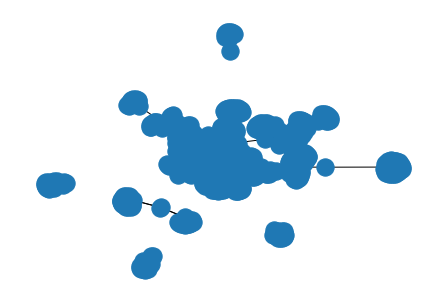

In [12]:
nx.draw(G_new)

In [13]:
avg_deg_new, avg_clstrng_new = avg_deg_cc(G_new) 
num = 0 
for c in nx.connected_components(G_new):
    num += nx.average_shortest_path_length(G_new.subgraph(c))*len(G_new.subgraph(c))
GT_avg_path_new = num/len(G_new.nodes())

In [14]:
print("New Simulated MU Network \n ")
print("Average degree" ,avg_deg_new)
print("Average path", GT_avg_path_new)
print("Average clusteirng", avg_clstrng_new)
print("Newly generated graph diameter is", max([max(j.values()) for (i,j) in nx.shortest_path_length(G_new)]))#.subgraph(component)))

New Simulated MU Network 
 
Average degree 3.271662763466042
Average path 5.502214557458918
Average clusteirng 0.1840353796304405
Newly generated graph diameter is 10


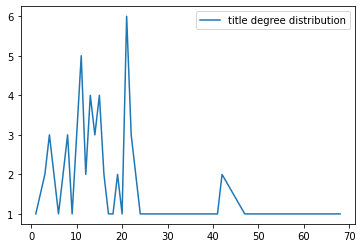

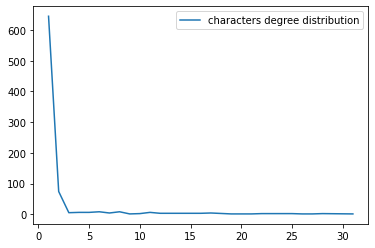

In [15]:
deg_dst(G_new)

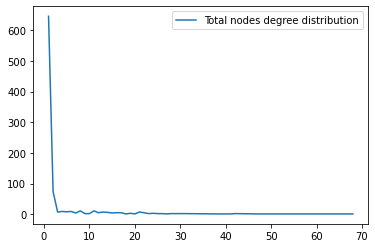

In [16]:
deg_dst_Graph(G_new)

### Random simulated graph for newly generated graph

In [17]:
GT_p = avg_deg_new /(len(G_new.nodes())-1) # caliculating probability
GT_nodes=len(G_new.nodes())
print('Random model probability value',GT_p, 'and length of nodes', GT_nodes)

Random model probability value 0.0038354780345440116 and length of nodes 854


In [18]:
GT_sim_rndm = nx.gnp_random_graph(GT_nodes, GT_p)
# Simulated Random 
avg_deg_sim, avg_clstrng_sim =  avg_deg_cc(GT_sim_rndm)

### Isolated Graph

In [19]:
i= nx.number_connected_components(GT_sim_rndm)
i

32

In [20]:
num = 0 
for c in nx.connected_components(GT_sim_rndm):
    num += nx.average_shortest_path_length(GT_sim_rndm.subgraph(c))*len(GT_sim_rndm.subgraph(c))
GT_sim_avg_path = num/len(GT_sim_rndm.nodes())

In [21]:
print("Updatd Random Simulated MU Network \n ")
print("Average degree" ,avg_deg_sim)
print("Average path", GT_sim_avg_path)
print("Average clusteirng", avg_clstrng_sim)

Updatd Random Simulated MU Network 
 
Average degree 3.3278688524590163
Average path 5.450119378036153
Average clusteirng 0.0025412960609911056


In [22]:
val1= GT_sim_avg_path/GT_avg_path_new
print(' Average path of Random Model Graph is ',val1,'times the average path of Marvel Universe')
val2 =  avg_clstrng_sim/avg_clstrng_new
print('Clustering co-efficient of Random graph is',val2,'times the Clustering co-efficient of Marvel Uuniverse')
print("Newly generated graph diameter is", max([max(j.values()) for (i,j) in nx.shortest_path_length(GT_sim_rndm)]))

 Average path of Random Model Graph is  0.9905319614713783 times the average path of Marvel Universe
Clustering co-efficient of Random graph is 0.013808736483681862 times the Clustering co-efficient of Marvel Uuniverse
Newly generated graph diameter is 12


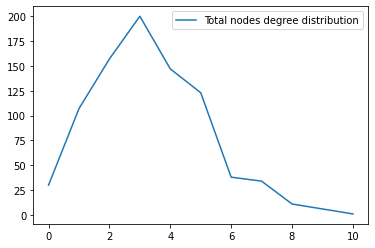

In [23]:
deg_dst_Graph(GT_sim_rndm)

### Prefrential Algorithm Method

In [24]:
new_nodes=list()
new_nodes1 = list(GT.neighbors('Werewolf by Night*'))
for i in new_nodes1: new_nodes.append(i)
new_nodes2= list(GT.neighbors('Moon Knight*'))
for i in new_nodes2: new_nodes.append(i)
new_nodes3= list(GT.neighbors('Eternals*'))
for i in new_nodes3: new_nodes.append(i)
new_nodes4= list(GT.neighbors('Helstrom*'))
for i in new_nodes4: new_nodes.append(i)
new_nodes5 = list(GT.neighbors('Runaways*'))
for i in new_nodes5: new_nodes.append(i)
new_nodes6 = list(GT.neighbors('Cloak & Dagger*'))
for i in new_nodes6: new_nodes.append(i)
print(new_nodes) # Nodes (actors) adding to the base cluster
print(len(new_nodes))

['Jack Russell', 'Elsa Bloodstone', 'Verussa', 'Jovan', 'Azarel', 'Liorn', 'Barasso', 'Billy Swan', 'Ted (The Man-Thing)', 'The Flaming Tuba', 'Ulysses Bloodstone', 'Marc Spector', 'Arthur Harrow', 'Layla El-Faouly', 'Khonshu', 'Bobbi', 'Billy', 'Taweret', 'Selim', 'Crawley', 'Donna', 'Yatzil', 'J.B.', 'Bek', 'Anton Mogart', 'Wendy Spector', 'Sersi', 'Ikaris', 'Thena', 'Ajak', 'Dane Whitman', 'Kingo', 'Sprite', 'Phastos', 'Makkari', 'Druig', 'Gilgamesh', 'Karun', 'Kro', 'Ben', 'Jack', 'Eros', 'Arishem', 'Daimon Helstrom', 'Ana Helstrom', 'Victoria Helstrom', 'Gabriella Rosetti', 'Dr. Louise Hastings', 'Chris Yen', 'Keith Spivey', 'Father Joshua Crow', 'Finn', 'Esther', 'Bryce', 'Officer Derrick Jackson', 'Ellis', 'Jolene Spivey', 'Alex Tilden', 'Archbishop Terrazi', 'Cameron Tate', 'Lee', 'Kthara', 'Papa', 'Aubree Richards', 'Alex Wilder', 'Nico Minoru', 'Karolina Dean', 'Gert Yorkes', 'Chase Stein', 'Molly Hernandez', 'Catherine Wilder', 'Geoffrey Wilder', 'Janet Stein', 'Victor Stein

In [25]:
# Removing 'Moon Knight','Eternals', 'Helstrom', 'Cloak & Dagger' & Runaways' and 'Werewolf by Night' clusters from the main graph
GT_p = GT.copy()
for i in new_nodes: 
    if i in GT_p.nodes(): GT_p.remove_node(i)
GT_p.remove_node('Moon Knight*')
GT_p.remove_node('Eternals*')
GT_p.remove_node('Helstrom*')
GT_p.remove_node('Cloak & Dagger*') 
GT_p.remove_node('Runaways*')
GT_p.remove_node('Werewolf by Night*')
print("Node count in actual MU network",len(GT.nodes()))
print("Removing the nodes including the small clusters titles",len(new_nodes))
print("Node count after removing nodes from the MU network",len(GT_p.nodes()))

Node count in actual MU network 854
Removing the nodes including the small clusters titles 123
Node count after removing nodes from the MU network 727


In [26]:
def PAM(G,avg_deg,new_nodes):
    node_count=len(G.nodes())
    G_PAM = nx.Graph
    G_PAM = G.copy()
    i = node_count-1
    G_node_list = np.array((G.nodes()))
    #node probability
    node_prob =[]
    for n in G.nodes():
        prob = G.degree(n)/(2*len(G.edges()))
        node_prob.append(prob)
#node_prob
    
    for n in range(len(new_nodes)):
        i = np.random.choice(new_nodes)
        G_PAM.add_node(i)
        while (G_PAM.degree(i)!=round(avg_deg)):
            j=np.random.choice(G_node_list, p= node_prob)
            #print(i,j,G_PAM.degree(i))
            G_PAM.add_edge(i,j)
        new_nodes.remove(i) 
        
    return G_PAM

In [27]:
GT_pp = GT.copy()
PAM_MU = PAM(GT_p,avg_deg_new,new_nodes)

In [28]:
avg_deg_PAM, avg_clstrng_PAM = avg_deg_cc(PAM_MU)
PAM_avg_path= nx.average_shortest_path_length(PAM_MU)
print(len(PAM_MU.nodes()), len(PAM_MU.edges()))
print("PAM-MU Graph \n ")
print("Average degree" ,avg_deg_PAM )
print("Average path", PAM_avg_path)
print("Average clusteirng", avg_clstrng_PAM)
print("Newly generated PAM graph diameter is", max([max(j.values()) for (i,j) in nx.shortest_path_length(PAM_MU)]))

848 1382
PAM-MU Graph 
 
Average degree 3.259433962264151
Average path 4.525392060769419
Average clusteirng 0.00183526327288617
Newly generated PAM graph diameter is 8


In [29]:
val1= PAM_avg_path/GT_avg_path_new
print(' Average path of PAM_MU Graph is ',val1,'times the average path of Marvel Universe')
val2 =  avg_clstrng_PAM/avg_clstrng_new
print('Clustering co-efficient of Random graph is',val2,'times the Clustering co-efficient of Marvel Uuniverse')

 Average path of PAM_MU Graph is  0.822467392630973 times the average path of Marvel Universe
Clustering co-efficient of Random graph is 0.009972339430448333 times the Clustering co-efficient of Marvel Uuniverse


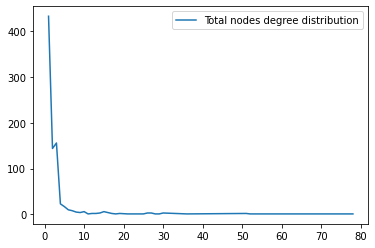

In [30]:
deg_dst_Graph(PAM_MU)

In [31]:
components1 = sorted(nx.connected_components(G_new), key=len, reverse=True)
communities1 = community.louvain_communities(G_new.subgraph(components1[0]))
i=1
for group in communities1:
    print(i,len(group),'\n',group)
    i+=1

1 23 
 {'Happy Sam Sawyer', 'Agent Ford', 'Agent Fisher', 'Jack Thompson', 'Hank', 'Rufus', 'Daniel Sousa', 'Jason Wilkes', 'Dottie Underwood', 'Calvin Chadwick', 'Agent Blackwell', 'Carol', 'Hugh Jones', 'Edwin Jarvis', 'Dr. Ivchenko', 'Detective Andrew Henry', 'Ana Jarvis', 'Agent Carter*', 'Roger Dooley', 'Agent Vega', 'Joseph Manfredi', 'Whitney Frost', 'Vernon Masters'}
2 4 
 {'Betty Ross', 'Samuel Sterns', 'The Incredible Hulk*', 'Emil Blonsky'}
3 37 
 {'Iron Man 3*', 'Ying Nan', 'Soo', 'Jon Jon', 'Death Dealer', 'Mrs. Chen', 'Harley Keener', 'Marvel One-Shot: All Hail the King*', 'Maya Hansen', 'Trevor Slattery', 'Pat Kiernan', 'Young Xialing', 'Jackson Norris', 'Li', 'Thomas Roberts', 'Master Guang Bo', 'Shaun', 'Gao Lei', 'Brandt', 'Yuchen', 'Mrs. Davis', 'White Power Dave', 'Savin', 'Waipo', 'Shang-Chi and the Legend of the Ten Rings*', 'Justin Hammer', 'Katy', 'Klev', 'Chancellor Hui', 'Herman', 'Xialing', 'John', 'Ruihua', 'Razor Fist', 'Aldrich Killian', 'Xu Wenwu', 'Fletc

In [32]:
components2 = sorted(nx.connected_components(GT_sim_rndm), key=len, reverse=True)
communities2 = community.louvain_communities(GT_sim_rndm.subgraph(components2[0]))
i=1
for group in communities2:
    print(i,len(group))
    i+=1

1 60
2 28
3 65
4 22
5 23
6 27
7 45
8 38
9 44
10 29
11 73
12 63
13 53
14 58
15 45
16 49
17 28
18 48
19 24


In [33]:
components3 = sorted(nx.connected_components(PAM_MU), key=len, reverse=True)
communities3 = community.louvain_communities(PAM_MU.subgraph(components3[0]))
i=1
for group in communities3:
    print(i,len(group),'\n',group)
    i+=1

1 43 
 {'Madisynn', 'Cousin Ched', 'Daredevil', 'Holden Holliway', 'Crawley', 'Abomination', 'Eugene Patilio', 'Derek', 'Wrecker', 'Elaine Walters', 'Betty Ross', 'She-Hulk: Attorney at Law*', 'Man-Bull', "Augustus 'Pug' Pugliese", 'Pedro The Bartender', 'Skaar', 'Porcupine', 'Dennis Bukowski', 'Saracen', 'Mallory Book', 'Judge Price', 'Alan', 'Hank Sanderson', 'Cornelius P. Willows', 'Mr. Immortal', 'Aunt Melanie', 'The Incredible Hulk*', 'Morris Walters', 'Lulu', 'Donny Blaze', 'Noah', 'Bruce Banner', 'Emil Blonsky', 'Samuel Sterns', 'Skeevy Guy', 'Josh Miller', 'Thunderball', 'Papa', 'Titania', 'Nikki Ramos', 'Heather', 'Auran', 'Jennifer Walters'}
2 61 
 {"Timothy 'Dum Dum' Dugan-AR", 'Andrew Garner', "Alphonso 'Mack' Mackenzie", 'Flint', "Marvel One-Shot: A Funny Thing Happened on the Way to Thor's Hammer*", 'Justis Ambrose', 'Agent Davis', "Elena 'Yo-Yo' Rodriguez", 'Kasius', 'Leo Fitz', 'Mike Peterson', 'Marvel One-Shot: Item 47*', 'Marvel One-Shot: The Consultant*', 'Daniel Whi